### Sigmoid curve fit

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

# copying and pasting rating curve data from the excel sheet
# discharge = np.array([0.3143, 0.2295, 0.2472, 0.6003, 0.6569, 0.9323, 0.6586, 1.3296, 1.1053, 1.5344, 7.1512, 5.9894, 6.6533, 1.1611, 1.8364]) # cfs
# depth = np.array([19.429, 16.015, 18.354, 20.129, 20.764, 21.049, 20.024, 21.481, 20.957, 21.540, 29.280, 29.047, 27.783, 22.237, 21.583]) # cms
# max value the curve can reach
#L = 37 # the riverbank will overflow when it reaches this value (cm)

depth = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
discharge = np.array([5, 9, 15, 20, 28, 35, 45, 50, 58, 60])


Fitting the curve

In [9]:
# sigmoid function with fixed L
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# initial guess for parameters k and x0
initial_guess = [max(discharge), 1, np.median(depth)]

# Fit the curve
params, covariance = curve_fit(sigmoid, depth, discharge, p0=initial_guess)

Plot

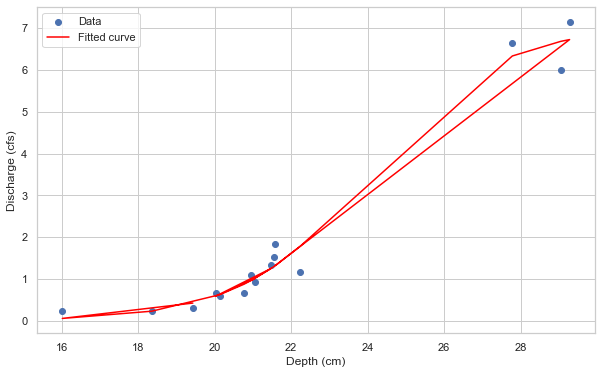

Fitted parameters: L = 7.033922126446211, k = 0.5920571695891959, x0 = 24.05567733525345


In [10]:
# Plot the data and the fitted curve
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(depth, discharge, label='Data')
plt.plot(depth, sigmoid(depth, *params), label='Fitted curve', color='red')
plt.xlabel('Depth (cm)')
plt.ylabel('Discharge (cfs)')
plt.legend()
plt.show()

# Print the fitted parameters
print(f'Fitted parameters: L = {params[0]}, k = {params[1]}, x0 = {params[2]}')